In [19]:
import os
os.chdir("../../")
from PotentialFlowSolver import *

In [20]:
kwargs = {"ylim":[-4,4], "V_inf": 10, "g_div": 7.5, "write":True,
           "n_airfoil": 2000,
           "n_fs": 50,
           "n_bed": 50,
           "n_inlet": 20,
           "n_outlet": 20}
model = PotentialFlowSolver("0012" , alpha=20, P=2, kwargs = kwargs)

In [21]:
model.solve()

93840
Starting iteration 0
93840
	 dGamma: -10.793052282448084
	 Iteration time: 5.100339412689209 seconds

Starting iteration 1
93840
	 dGamma: 9.870590591503921
	 Iteration time: 2.3964219093322754 seconds

Starting iteration 2
93840
	 dGamma: 0.8432769320113467
	 Iteration time: 2.410400867462158 seconds

Starting iteration 3
93840
	 dGamma: 0.0796215042999371
	 Iteration time: 2.4352872371673584 seconds

Starting iteration 4
93840
	 dGamma: -0.0004836743690402715
	 Iteration time: 2.4848339557647705 seconds

Starting iteration 5
93840
	 dGamma: 5.1219924838006564e-05
	 Iteration time: 2.4197936058044434 seconds

Starting iteration 6
93840
	 dGamma: -4.250086507540495e-06
	 Iteration time: 2.4381349086761475 seconds

Starting iteration 7
Solver converged in 6 iterations
	 Total time: 19.686458826065063
	 dGamma: 3.750408012663755e-08




In [22]:
nasa =np.array([[0, -3.66423],
[0.00218341, -5.04375],
[0.00873362, -5.24068],
[0.0131004, -4.67125],
[0.0174672, -4.32079],
[0.0480349, -2.74347],
[0.0742358, -2.26115],
[0.0982533, -1.95405],
[0.124454, -1.7345],
[0.146288, -1.55884],
[0.176856, -1.36109],
[0.28821, -1.00829],
[0.320961, -0.941877],
[0.384279, -0.787206],
[0.447598, -0.654432],
[0.515284, -0.543461],
[0.576419, -0.432633],
[0.637555, -0.343703],
[0.700873, -0.254725],
[0.766376, -0.1657],
[0.831878, -0.098572],
[0.893013, -0.00964205],
[0.958515, 0.0793835],
[1, 0.124088]])


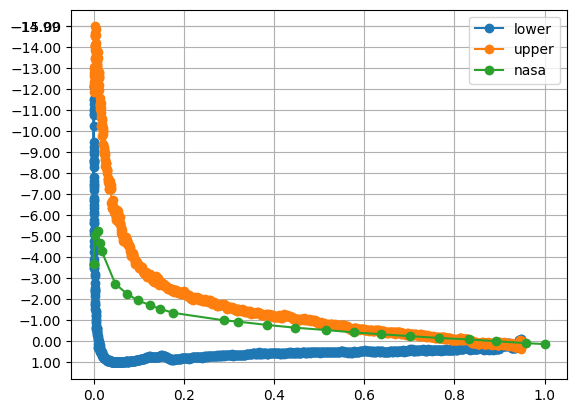

In [23]:
line_clasifier = model.mesh.cell_data_dict["gmsh:physical"]["line"]
naca_points = np.unique(model.mesh.cells_dict["line"][(line_clasifier == 5)])
points = model.mesh.points[naca_points][:,0]
pressure = np.array(model.pressure_coeff.at(model.mesh.points[naca_points][:,:2]))

#shortening the plot to avoid funny buisness at the trailing edge
points = points[model.kwargs.get("n_airfoil")//30:-model.kwargs.get("n_airfoil")//30]
points -= np.min(points)
points *= 0.95/np.max(points)
pressure = pressure[model.kwargs.get("n_airfoil")//30:-model.kwargs.get("n_airfoil")//30]
middle = model.kwargs.get("n_airfoil")//2 - model.kwargs.get("n_airfoil")//30

plt.plot(points[:middle][::-1] ,np.flip(pressure[:middle]), label = "lower", marker = "o", color = "C0")
plt.plot(points[middle:] ,(pressure[middle:]), label = "upper", marker = "o", color = "C1")
plt.plot(nasa[:,0], nasa[:,1], color = "C2", label = "nasa", marker = 'o')
plt.yticks(np.hstack((np.arange(int(np.min(pressure))-1, 1.1, 1), np.min(pressure))))
plt.legend(loc = "upper right")
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [24]:
coords = np.array([233, 234, 237, 240, 241, 244, 245, 248, 251, 254, 255, 258, 259,
       262, 263, 266, 267, 270, 271, 274, 275, 278, 281, 282, 283, 286,
       287, 290, 291, 294, 295, 296, 299, 300, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 315, 316, 317, 318, 319, 322, 323, 324,
       325, 326, 327, 330, 331, 332, 333, 334])

np.min(model.pressure_coeff.at(model.fd_mesh.coordinates.dat.data_ro[coords]))

np.float64(-4.5591716901716035)

In [25]:
model.fd_mesh.coordinates.dat.data_ro[[331,332]]

array([[0.03016691, 0.15678513],
       [0.02991262, 0.1571913 ]])

In [26]:
model.Gamma

np.float64(-11.794304580868197)

In [27]:
model.lift_coeff

np.float64(2.3588609161736396)

In [28]:
model.lift

np.float64(144.48023111563543)

In [29]:
np.min(model.pressure_coeff.dat.data)

np.float64(-153.75043482148837)

In [30]:
-4.251446823121933

-4.251446823121933